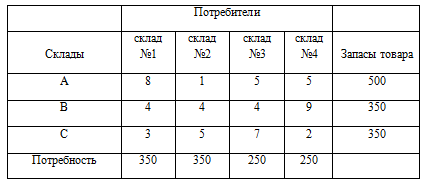

In [197]:
# Печатаем картинку
from IPython.display import Image
Image("tr.png")

5  - минимальная цена
3  используемый склад
4650  - Цена
{1: 0, 2: 0, 3: 0, 4: 0}  - потребность
{'A': 0, 'B': 0, 'C': 0}  - запасы
1200 - увезли со склада
1200  - наша потребность


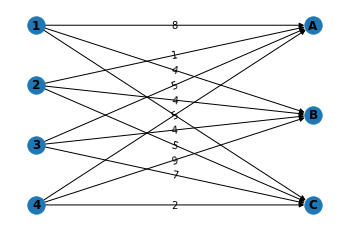

In [198]:
# рисуем графы с весами
import networkx as nx
G1 = nx.DiGraph()
G1.add_weighted_edges_from([("1","A",8), ("2","A",1) , ("3","A",5), ("4","A",5), 
                           ("1","B",4), ("2","B",4), ("3","B",4), ("4","B",9),
                           ("1","C", 3), ("2","C",5) , ("3","C",7), ("4","C",2)])


pos = nx.circular_layout(G1)

pos["1"] = [-2,2]
pos["2"] = [-2,1]
pos["3"] = [-2,0]
pos["4"] = [-2,-1]

pos["A"] = [2,2]
pos["B"] = [2,0.5]
pos["C"] = [2,-1]

edge_labels = nx.get_edge_attributes(G1, "weight")
nx.draw_networkx_edge_labels(G1, pos, edge_labels)

nx.draw(G1, pos = pos, with_labels = True, font_weight = 'bold')

#Решаем задачу

# Потребность складов
need = {1:350,2:350,3:250,4:250}
# Запасы
store = {"A":500,"B":350,"C":350}
# Цены
price_A = {1:8,2:1,3:5,4:5}
price_B = {1:4,2:4,3:4,4:9}
price_C = {1:3,2:5,3:7,4:2}
Total_Price = 0 
store_Use = 0
K_A, K_B, K_C, K_Use = 0,0,0,0
Sclad = 0
Potrebnost = 0
while sum(need.values()) !=0 or sum(store.values()) !=0 : 
    Price_min_A, Price_min_B, Price_min_C, Price_min = 10000000,10000000,10000000,100000000
    for i in range(1,5):
        if price_A[i] < Price_min_A:
            Price_min_A = price_A[i]
            K_A = i
    for i in range(1,5):
        if price_B[i] < Price_min_B:
            Price_min_B = price_B[i]
            K_B = i
    for i in range(1,5):
        if price_C[i] < Price_min_C:
            Price_min_C = price_C[i]
            K_C = i

    if Price_min_A < Price_min_B:
        Price_min = Price_min_A
        store_Use = "A"
        K_Use = K_A
    if Price_min_A < Price_min_C:
        Price_min = Price_min_A
        store_Use = "A"
        K_Use = K_A
    if Price_min_C < Price_min:
        Price_min = Price_min_C
        store_Use = "C"
        K_Use = K_C
    if Price_min_B < Price_min:
        Price_min = Price_min_B
        store_Use = "B"
        K_Use = K_B

    if store[store_Use] >= need[K_Use] and need[K_Use] != 0 and store[store_Use] != 0:
        Total_Price += Price_min * need[K_Use]
        Sclad+=need[K_Use]
        Potrebnost+=need[K_Use]
        store[store_Use] = store[store_Use] - need[K_Use]
        need[K_Use] = need[K_Use] - need[K_Use]

    if store[store_Use] <= need[K_Use] and need[K_Use] != 0 and store[store_Use] != 0:
        Total_Price += Price_min * need[K_Use]
        Sclad+=store[store_Use]
        Potrebnost+=store[store_Use]
        need[K_Use] = need[K_Use] - store[store_Use] 
        store[store_Use] = store[store_Use] - store[store_Use]

    if need[K_Use] == 0:
        if store_Use == "A":
            price_A[K_Use] = 10000
        if store_Use == "B":
            price_B[K_Use] = 10000
        if store_Use == "C":
            price_C[K_Use] = 10000

    if store[store_Use] == 0:
        if store_Use == "A":
            price_A[K_Use] = 10000
        if store_Use == "B":
            price_B[K_Use] = 10000
        if store_Use == "C":
            price_C[K_Use] = 10000

print(Price_min, " - минимальная цена")
print(K_Use, " используемый склад")
print(Total_Price, " - Цена")

print(need, " - потребность")
print(store, " - запасы")

print(Sclad, "- увезли со склада")
print(Potrebnost, " - наша потребность")

